In [2]:
# 先看看数据集的基本信息
import pandas as pd
import numpy as np
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

#print(data.head())

##Age 年龄
##Cabin 船舱号
##Embarked 登船港口
##Fare 票价
##Name 乘客姓名
##Parch 不同代直系亲属人数
##SibSp 同代直系亲属人数
##PassengerId 乘客ID
##Pclass 客舱等级
##Sex 性别
##Ticket 船票编号
##Survived 存活情况

In [3]:
# 删除name
data = data.drop(columns=['Name'])
test = test.drop(columns=['Name'])

In [4]:
# 首先进行数据清洗
## 缺失值处理
## 异常值处理
## 数据类型转化
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [5]:
## 缺失值处理
### 一般套路就是数值型用中位数填充，离散型用众数填充
data.info()
### 可以看出缺失值在Age，Cabin，Embarked上，后两者是分类变量，前面是数值的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
## 对age我们用中位数填充
age=data['Age'].values.reshape(-1,1)         #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer     #导入模块
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')    #实例化，中值填充
imp_median=imp_median.fit_transform(age)     #fit_transform一步完成调取结果

data['Age']=imp_median       #填充好的数据传回到 data['Age']列

data['Age'].isnull().sum()   #检验是否还有空值，为0即说明空值均已被填充

## 对age我们用中位数填充
age=test['Age'].values.reshape(-1,1)         #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer     #导入模块
imp_median=SimpleImputer(missing_values=np.nan,strategy='median')    #实例化，中值填充
imp_median=imp_median.fit_transform(age)     #fit_transform一步完成调取结果

test['Age']=imp_median       #填充好的数据传回到 data['Age']列

test['Age'].isnull().sum()   #检验是否还有空值，为0即说明空值均已被填充

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [8]:
## 对于Embarked我们用众数填充
age=data['Embarked'].values.reshape(-1,1)  #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer #导入模块
imp_most_frequent=SimpleImputer(missing_values=np.nan,strategy='most_frequent')  #实例化，众数填充
imp_most_frequent=imp_most_frequent.fit_transform(age)     #fit_transform一步完成调取结果

data['Embarked']=imp_most_frequent       #填充好的数据传回到 data['Age']列

data['Embarked'].isnull().sum()          #检验是否还有空值，为0即说明空值均已被填充

## 对于test的fare我们用众数填充
fare=test['Fare'].values.reshape(-1,1)  #取出缺失值所在列的数值，sklearn当中特征矩阵必须是二维才能传入 使用reshape(-1,1)升维

from sklearn.impute import SimpleImputer #导入模块
imp_most_frequent=SimpleImputer(missing_values=np.nan,strategy='most_frequent')  #实例化，众数填充
imp_most_frequent=imp_most_frequent.fit_transform(fare)     #fit_transform一步完成调取结果

test['Fare']=imp_most_frequent       #填充好的数据传回到 data['Age']列

test['Fare'].isnull().sum()          #检验是否还有空值，为0即说明空值均已被填充

0

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [10]:
## 对于Cabin由于缺失值太多，我们这里先去掉他
data = data.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [12]:

## 下面做数据类型转换
### 数值型
data['PassengerId'] = data['PassengerId'].astype('float64')
data['Survived'] = data['Survived'].astype('float64')
data['Pclass'] = data['Pclass'].astype('float64')
data['SibSp'] = data['SibSp'].astype('float64')
data['Parch'] = data['Parch'].astype('float64')

test['PassengerId'] = test['PassengerId'].astype('float64')
# test['Survived'] = test['Survived'].astype('float64')
test['Pclass'] = test['Pclass'].astype('float64')
test['SibSp'] = test['SibSp'].astype('float64')
data['Parch'] = data['Parch'].astype('float64')

In [13]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

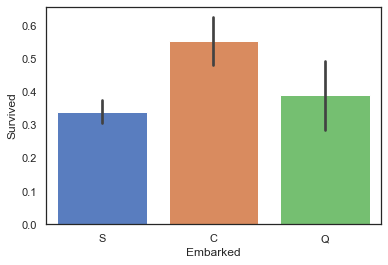

In [14]:
import seaborn as sns
#设置sns样式
sns.set(style='white',context='notebook',palette='muted')
sns.barplot(data=data,x='Embarked',y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

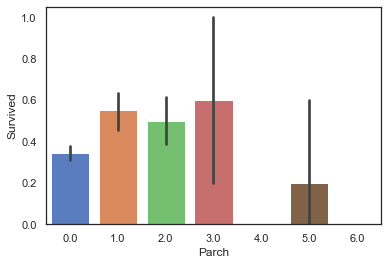

In [15]:
sns.barplot(data=data,x='Parch',y='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

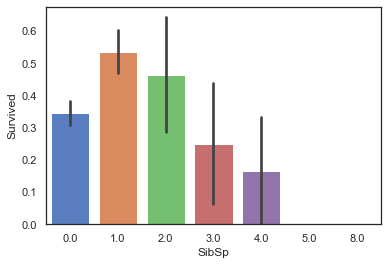

In [16]:
sns.barplot(data=data,x='SibSp',y='Survived')

In [17]:
data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [18]:
## ticket不知道怎么处理，先去掉
data = data.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float64
 1   Pclass       418 non-null    float64
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    float64
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 26.2+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

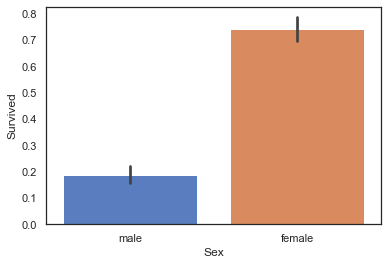

In [20]:
sns.barplot(data=data,x='Sex',y='Survived')
## 我们发现女性高于男性在幸存率

In [21]:
## 数据类型转化，只需要处理性别和Embarked就好
embark_dummies  = pd.get_dummies(data['Embarked'])
data = data.join(embark_dummies)
data = data.drop(columns=['Embarked'])
# data
embark_dummies_test  = pd.get_dummies(test['Embarked'])
test = test.join(embark_dummies_test)
test = test.drop(columns=['Embarked'])

In [22]:
sex_dummies = pd.get_dummies(data['Sex'])
data = data.join(sex_dummies)
data = data.drop(columns=['Sex'])
# data
sex_dummies_test = pd.get_dummies(test['Sex'])
test = test.join(sex_dummies_test)
test = test.drop(columns=['Sex'])

In [23]:
data.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
C                uint8
Q                uint8
S                uint8
female           uint8
male             uint8
dtype: object

In [24]:
data['C'] = data['C'].astype('float64')
data['Q'] = data['Q'].astype('float64')
data['S'] = data['S'].astype('float64')
data['female'] = data['female'].astype('float64')
data['male'] = data['male'].astype('float64')

test['C'] = test['C'].astype('float64')
test['Q'] = test['Q'].astype('float64')
test['S'] = test['S'].astype('float64')
test['female'] = test['female'].astype('float64')
test['male'] = test['male'].astype('float64')

In [25]:
data = data.drop(columns=['PassengerId'])
test = test.drop(columns=['PassengerId'])
data.describe()  ## 我们通过训练集的mean 和 std对test做相同处理，保证数据集的分布一致

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028,0.352413,0.647587
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0.0,3.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,1.0,0.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000,0.0,0.0,1.0,0.0,1.0
887,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,1.0,1.0,0.0
888,0.0,3.0,28.0,1.0,2.0,23.4500,0.0,0.0,1.0,1.0,0.0
889,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0


In [29]:
data.values[:,1:]

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  1.,  0.],
       [ 3., 26.,  0., ...,  1.,  1.,  0.],
       ...,
       [ 3., 28.,  1., ...,  1.,  1.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       [ 3., 32.,  0., ...,  0.,  0.,  1.]])

In [27]:
from sklearn.preprocessing import StandardScaler


#标准化，返回值为标准化后的数据｜
data_new = StandardScaler().fit_transform(data.values[:,1:])


In [28]:
data_new

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.61583843,
        -0.73769513,  0.73769513],
       [-1.56610693,  0.66386103,  0.43279337, ..., -1.62380254,
         1.35557354, -1.35557354],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.61583843,
         1.35557354, -1.35557354],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.61583843,
         1.35557354, -1.35557354],
       [-1.56610693, -0.25833709, -0.4745452 , ..., -1.62380254,
        -0.73769513,  0.73769513],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -1.62380254,
        -0.73769513,  0.73769513]])

In [30]:
X = data_new
y = data.values[:, [0]]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.25)     #8:2比较好
Xtest = torch.from_numpy(Xtest)
Ytest = torch.from_numpy(Ytest)
Xtest = Xtest.to(torch.float32)
Ytest = Ytest.to(torch.float32)
# print(Xtest.dtype)
class TitanicDataset(Dataset):
    def __init__(self, data,label):
 
        self.len = data.shape[0] # shape(多少行，多少列)
        self.x_data = torch.from_numpy(data)
        self.x_data = self.x_data.to(torch.float32)
        self.y_data = torch.from_numpy(label)
        self.y_data = self.y_data.to(torch.float32)
 
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
 
    def __len__(self):
        return self.len
 
 
train_dataset = TitanicDataset(Xtrain,Ytrain)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0) #num_workers 多线程
 
# design model using class
 
 
class Model(torch.nn.Module): 
    def __init__(self):
        super(Model, self).__init__() 
        self.linear0 = torch.nn.Linear(10, 8) 
        self.linear1 = torch.nn.Linear(8, 6) 
        self.linear2 = torch.nn.Linear(6, 4) 
        self.linear3 = torch.nn.Linear(4, 1) 
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = self.sigmoid(self.linear0(x)) 
        x = self.sigmoid(self.linear1(x)) 
        x = self.sigmoid(self.linear2(x)) 
        x = self.sigmoid(self.linear3(x)) 
        return x

model = Model()
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
 
 
# training cycle forward, backward, update
 
def train(epoch):
    train_loss = 0.0
    count = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        #print(inputs)
        y_pred = model.forward(inputs)


        loss = criterion(y_pred, labels)
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        count = i
 
    if epoch%2000 == 1999:
        print("train loss:", train_loss/count,end=',')
 
 
def test():
    with torch.no_grad():
        y_pred = model(Xtest)
        y_pred_label = torch.where(y_pred>=0.5,torch.tensor([1.0]),torch.tensor([0.0]))
        #print(y_pred)
        acc = torch.eq(y_pred_label, Ytest).sum().item() / Ytest.size(0)
        print("test acc:", acc)
 
if __name__ == '__main__':
    for epoch in range(1000):
        train(epoch)
        if epoch%100==1:
            test()
    

test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888
test acc: 0.6188340807174888


In [31]:
Ytrain

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],

In [2]:

from sklearn.preprocessing import StandardScaler
 
#标准化，返回值为标准化后的数据｜
datax = StandardScaler().fit_transform(data.values)
datax.shape

NameError: name 'data' is not defined

In [1]:
datax


NameError: name 'datax' is not defined

3